In [28]:
!git pull -q

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
sns.set_theme()

FILE = "/content/proj/data/processed/oscars_plus_bechdel_pol.parquet"
df = pd.read_parquet(FILE)
print("Rows:", len(df))


fatal: not a git repository (or any of the parent directories): .git
Rows: 10856


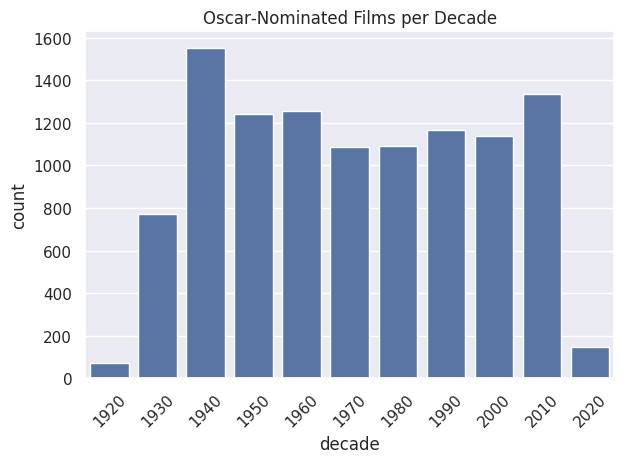

In [27]:
df["decade"] = (df["year_ceremony"] // 10) * 10
sns.countplot(x="decade", data=df, order=sorted(df["decade"].unique()))
plt.title("Oscar‑Nominated Films per Decade")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

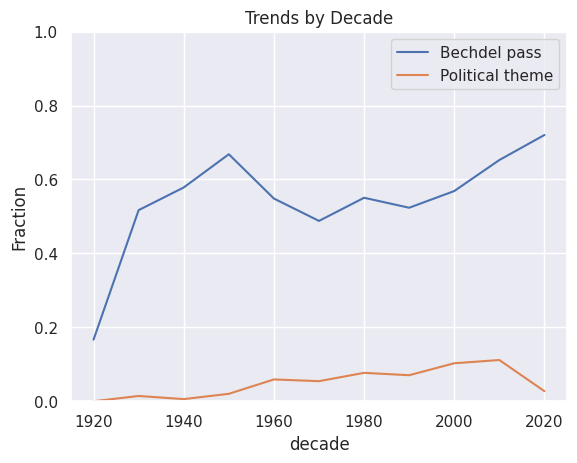

In [26]:
bech = (
    df.dropna(subset=["bechdel_pass"])
      .groupby("decade")["bechdel_pass"]
      .mean()
)
pol = (
    df.groupby("decade")["political_theme"]
      .mean()
)
bech.plot(label="Bechdel pass"); pol.plot(label="Political theme")
plt.ylim(0, 1); plt.ylabel("Fraction"); plt.legend()
plt.title("Trends by Decade"); plt.show()


<ipython-input-25-020259c6fa92>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot["bechdel_pass"]   = df_plot["bechdel_pass"].fillna(False).astype(str)


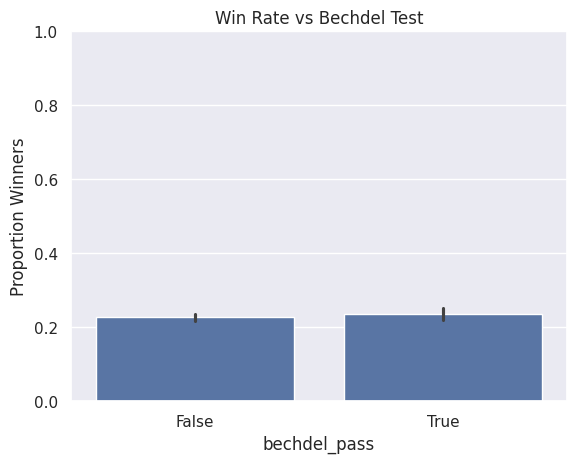

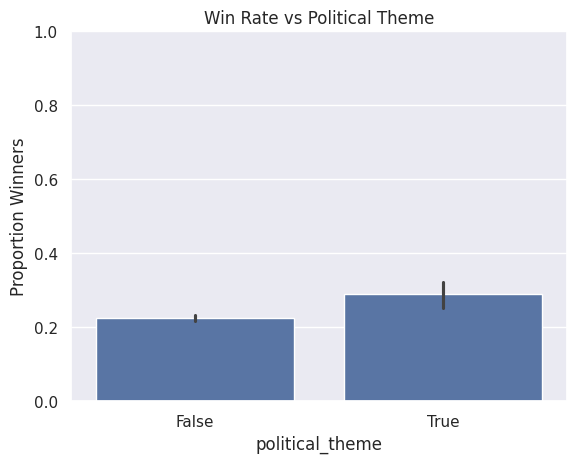

In [25]:
df_plot = df.copy()
df_plot["bechdel_pass"]   = df_plot["bechdel_pass"].fillna(False).astype(str)
df_plot["political_theme"] = df_plot["political_theme"].astype(str)

for col, title in [("bechdel_pass", "Bechdel Test"),
                   ("political_theme", "Political Theme")]:
    sns.barplot(x=col, y="winner", data=df_plot, estimator="mean")
    plt.ylim(0, 1); plt.ylabel("Proportion Winners")
    plt.title(f"Win Rate vs {title}"); plt.show()